In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
rides = pd.read_csv('day.csv')
videos = pd.read_csv('transcoding_mesurment.tsv',sep='\t')

In [3]:
rides.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
videos.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


## Q1

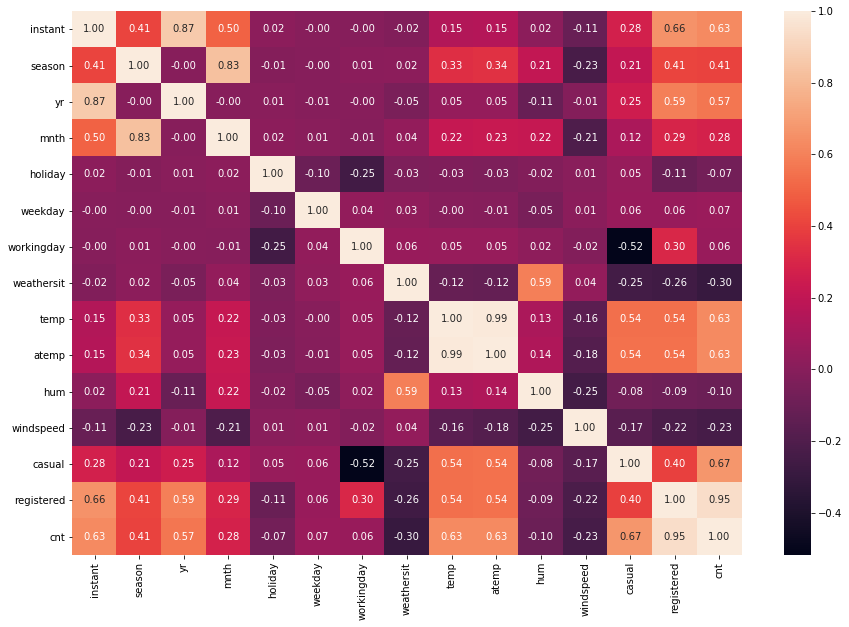

In [5]:
rides_corr = rides.corr(method='pearson')

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(rides_corr,annot=True,fmt='.2f')

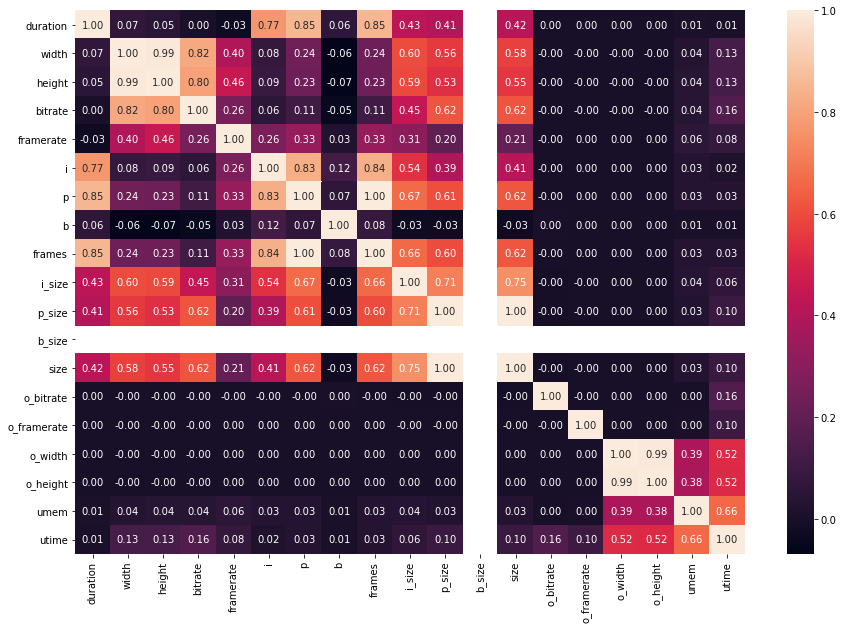

In [6]:
videos_corr = videos.corr(method='pearson')

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(videos_corr,annot=True,fmt='.2f')

The three target variables for the bike sharing dataset are count of casual users, count of registered users and total number of users. All these three target variables have high positive correlation with the normalized temperature and feeling normalized temperature. Which means higher the temperature on a particular day, more the number of users that day. 

## Q2

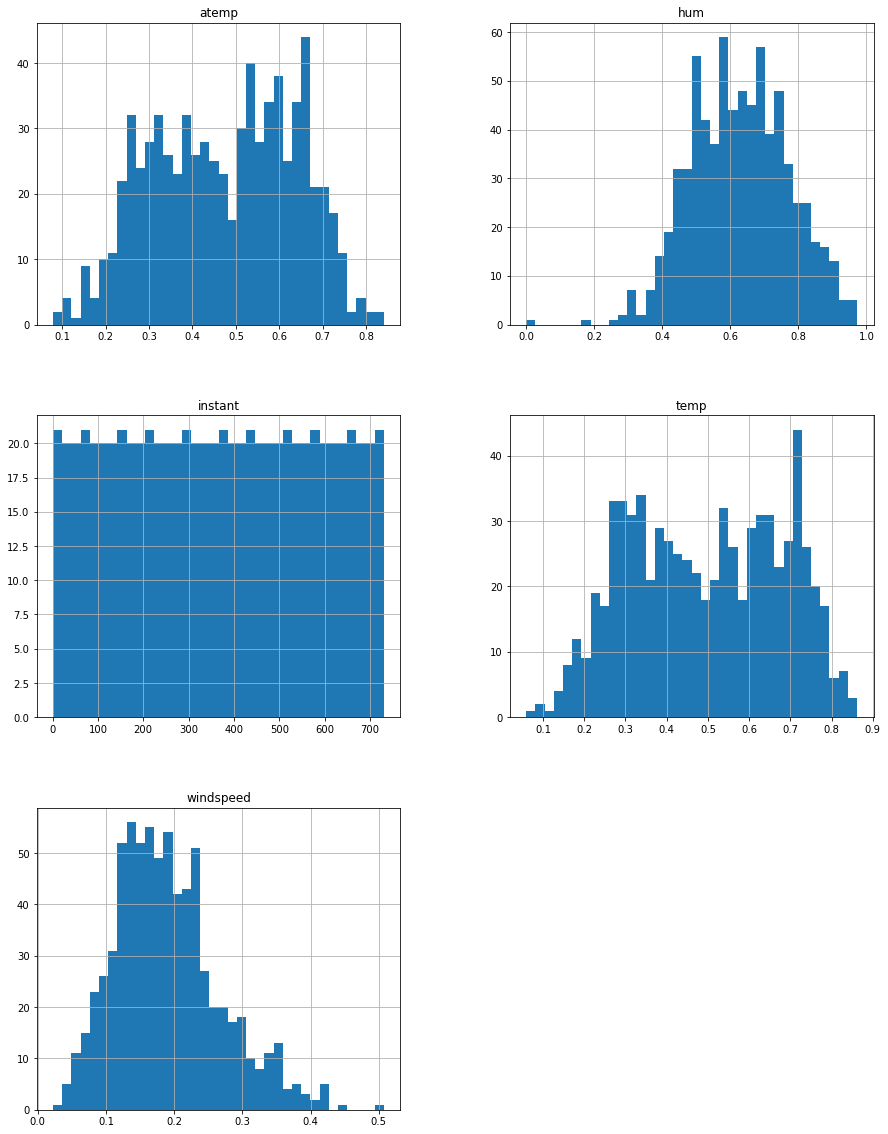

In [7]:
rides['dteday'] = pd.to_datetime(rides.dteday)

# categorical variables
rides['season'] = rides.season.astype('category')
rides['holiday'] = rides.holiday.astype('category')
rides['weekday'] = rides.weekday.astype('category')
rides['weathersit'] = rides.weathersit.astype('category')
rides['workingday'] = rides.workingday.astype('category')
rides['mnth'] = rides.mnth.astype('category')
rides['yr'] = rides.yr.astype('category')

numerical_features_rides = ['instant','temp','atemp','hum','windspeed']

hist = rides[numerical_features_rides].hist(bins=36,figsize=(15,20))

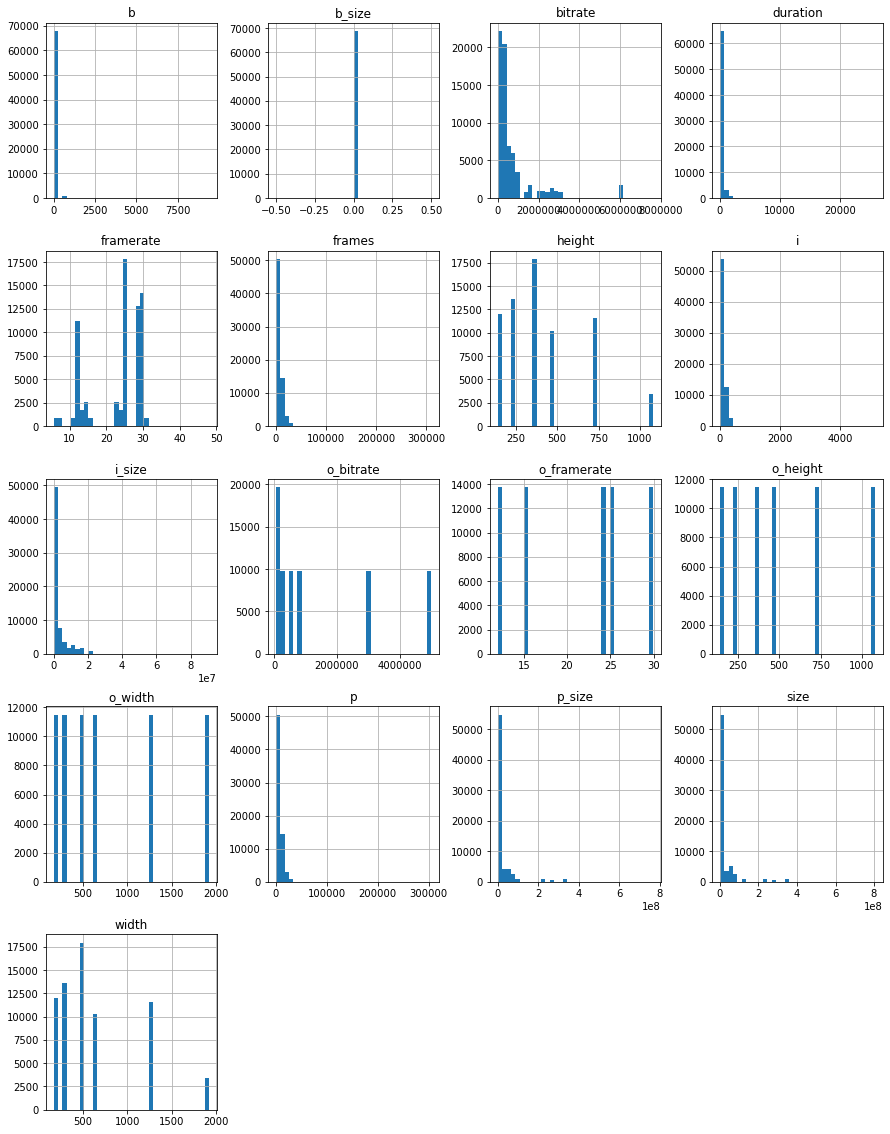

In [8]:
videos['codec'] = videos.codec.astype('category')
videos['o_codec'] = videos.o_codec.astype('category')

numerical_features_videos = videos.columns.drop(['codec','o_codec','utime','umem'])
hist = videos[numerical_features_videos].hist(bins=36,figsize=(15,20))

If the distribution of a feature has high skewness, we can use some transformation like a logarithmic transformation to reduce the skewness of the feature

## Q3

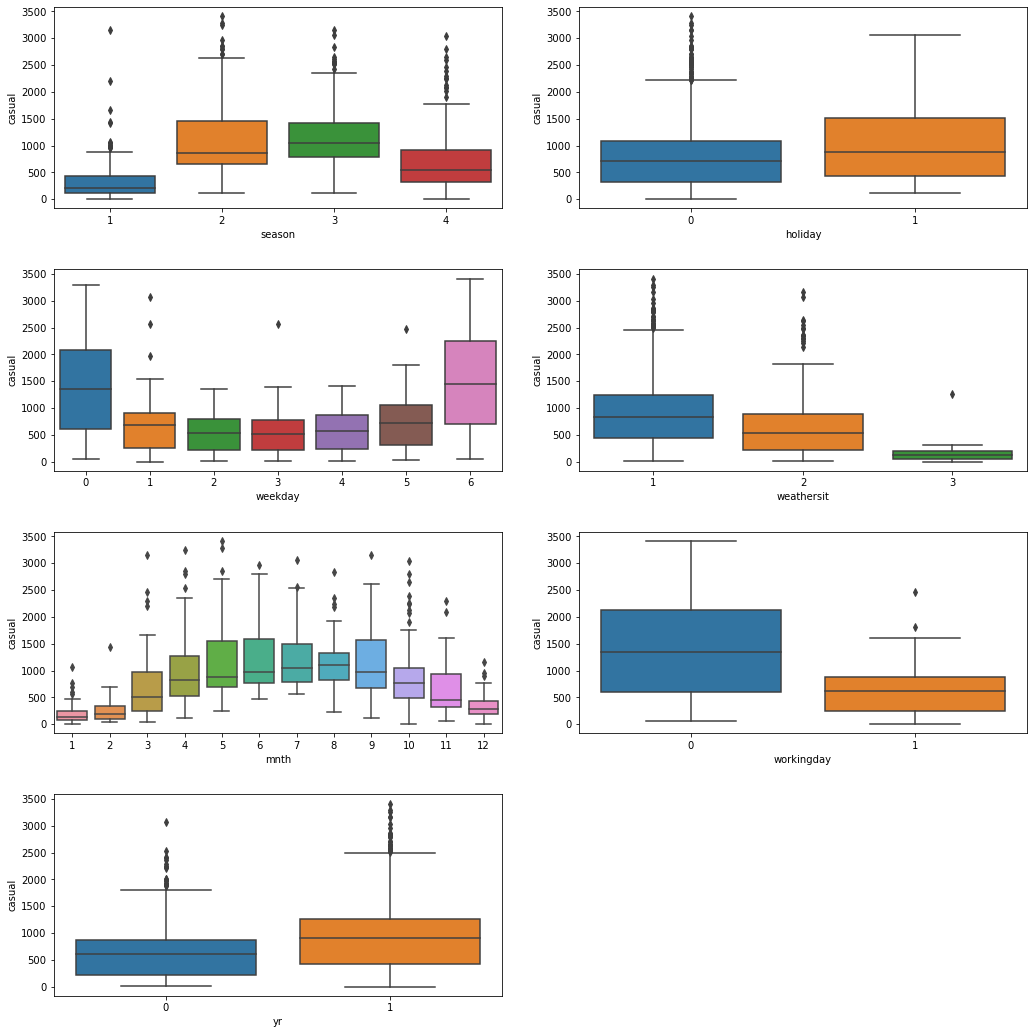

In [9]:
#categorical features vs casual
categorical_features_rides = ['season','holiday','weekday','weathersit','mnth','workingday','yr']
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['casual',col]],x=col,y='casual',ax=ax)
    
fig.tight_layout(pad=3.0)

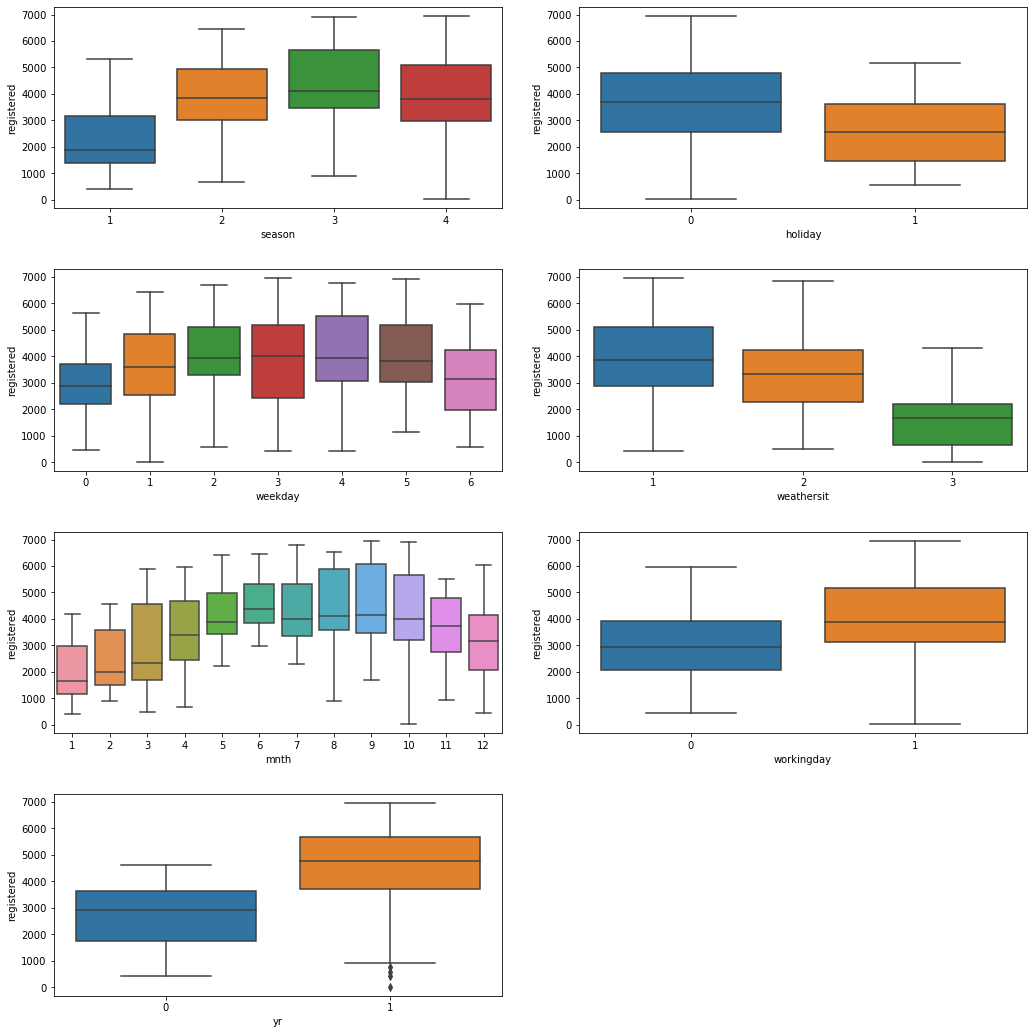

In [10]:
#categorical features vs registered
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['registered',col]],x=col,y='registered',ax=ax)
    
fig.tight_layout(pad=3.0)

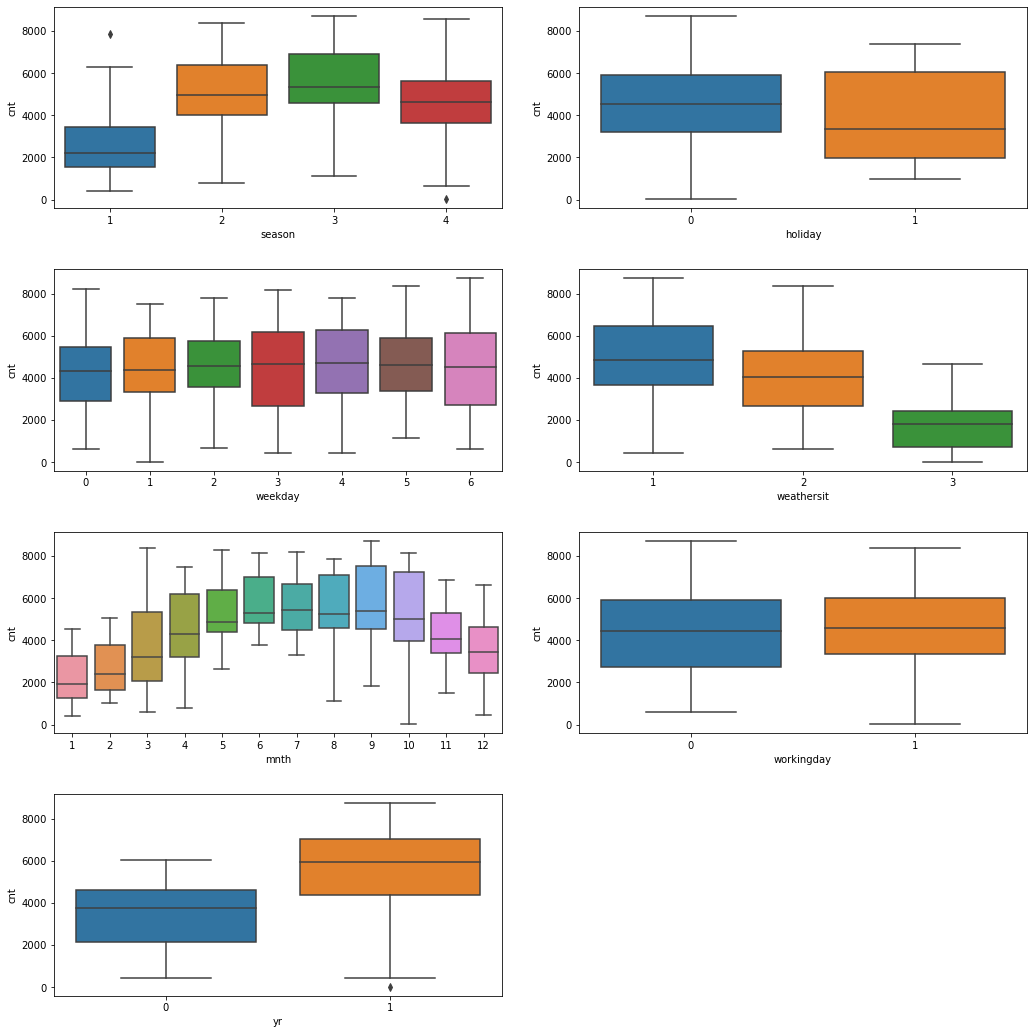

In [11]:
#categorical features vs cnt
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['cnt',col]],x=col,y='cnt',ax=ax)
    
fig.tight_layout(pad=3.0)

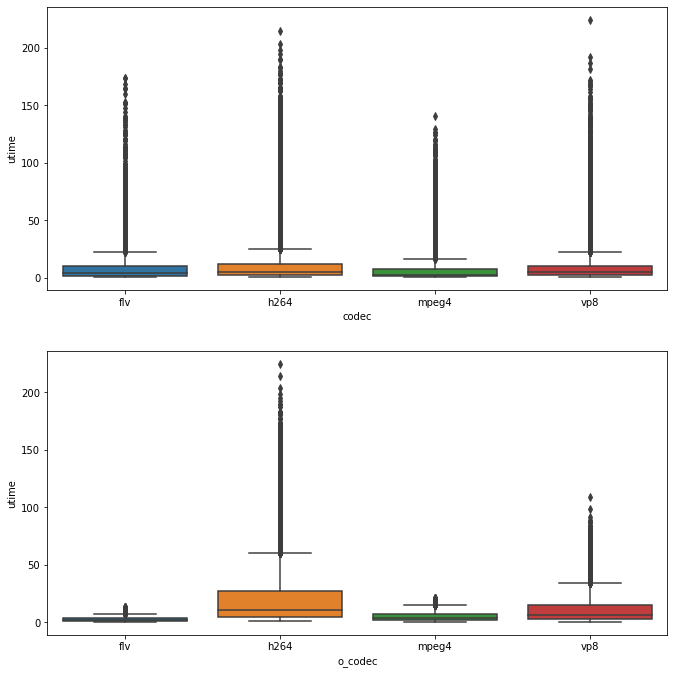

In [12]:
#categorical features vs utime

categorical_features_videos = ['codec','o_codec']

fig, axes = plt.subplots(nrows=2,ncols=1,squeeze=False)
axes_flatten = axes.flatten()

fig.set_figheight(10)
fig.set_figwidth(10)
for ax,col in zip(axes_flatten,categorical_features_videos):
    sns.boxplot(data=videos[['utime',col]],x=col,y='utime',ax=ax)
    
fig.tight_layout(pad=3.0)

## Q4

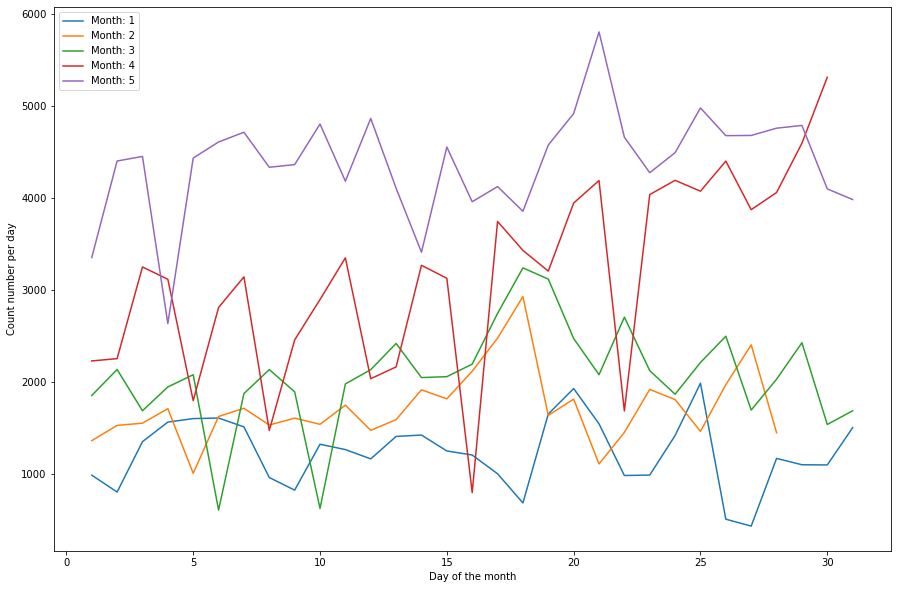

In [13]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
for i in range(1,6):
    get = rides.loc[(rides['mnth']==i) & (rides['yr']==0)]['cnt']
    ax.plot(np.arange(1,len(get)+1),get, label='Month: ' + str(i))

ax.set(xlabel='Day of the month', ylabel='Count number per day')
    
ax.legend()
plt.show()

## Q5

Mean transcoding time = 9.996 seconds
Median transcoding time = 4.408 seconds


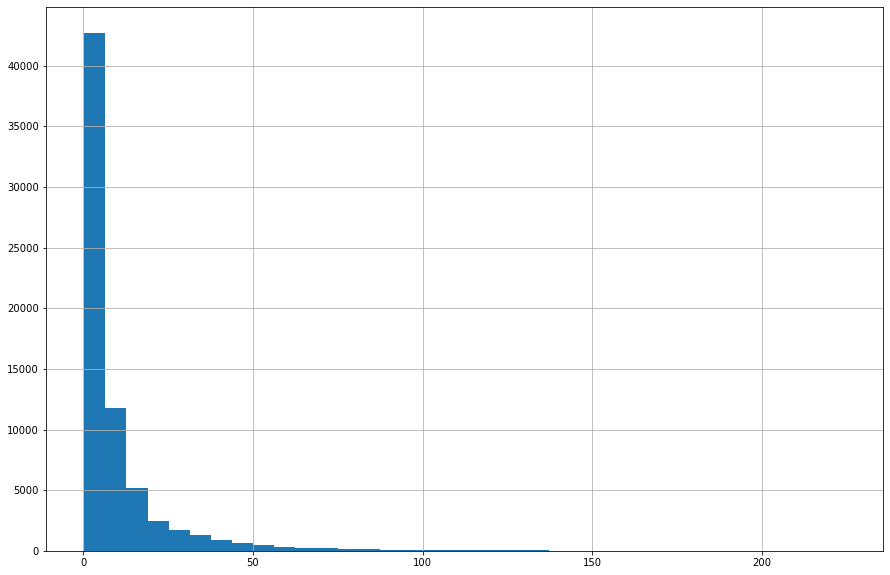

In [14]:
hist = videos['utime'].hist(bins=36,figsize=(15,10))
trns_mean = np.mean(videos['utime'])
trns_median = np.median(videos['utime'])

print('Mean transcoding time = {0:.3f} seconds'.format(trns_mean))
print('Median transcoding time = {0:.3f} seconds'.format(trns_median))

The transcoding time is positively skewed distribution as mean > median.

## Q6

Solution: The scalar encoding can be used where the categorical features have a natural ordering of values. For example in the categorical feature of 'Quality' with values {Poor, Fair, Typical, Good, Excellent}, using scalar encoding with integers from 1 through 5 also retains the information of how good the quality is in terms of magnitude of the number. Machine learning algorithms may be able to understand and harness this relationship. While, by using the one-hot encoding we lose the information of the natural ordering of values. In contrast, using the scalar encoding for categorical variables where no such ordinal relationship exists may result in poor performance or unexpected results. Thus, in such cases it is better to use one hot encoding which does not assume any such ordinal relationship.

Preprocessing the categorical data

In [15]:
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [16]:
rides.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
categorical_rides = ['holiday','workingday','weathersit']
rides_encode = pd.get_dummies(data = rides, prefix = None, prefix_sep='_',columns = categorical_rides, drop_first=False)

In [18]:
rides_encode.head()

,instant,dteday,season,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,1,0,0,1,0
1,2,2011-01-02,1,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,1,0,0,1,0
2,3,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,1,1,0,0
3,4,2011-01-04,1,0,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,1,1,0,0
4,5,2011-01-05,1,0,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,1,1,0,0


In [19]:
ridesStandard = rides_encode.drop(columns='dteday', inplace=False)

standard_columns_rides = ['instant','season','yr','mnth','weekday','temp','atemp','hum','windspeed']
standard_scaler = preprocessing.StandardScaler()
ridesStandard[standard_columns_rides] = standard_scaler.fit_transform(ridesStandard[standard_columns_rides])

In [20]:
ridesStandard.head()

,instant,season,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,-1.729683,-1.348213,-1.001369,-1.600161,1.498809,-0.826662,-0.679946,1.250171,-0.387892,331,654,985,1,0,1,0,0,1,0
1,-1.724944,-1.348213,-1.001369,-1.600161,-1.496077,-0.721095,-0.740652,0.479113,0.749602,131,670,801,1,0,1,0,0,1,0
2,-1.720205,-1.348213,-1.001369,-1.600161,-0.996930,-1.634657,-1.749767,-1.339274,0.746632,120,1229,1349,1,0,0,1,1,0,0
3,-1.715466,-1.348213,-1.001369,-1.600161,-0.497782,-1.614780,-1.610270,-0.263182,-0.389829,108,1454,1562,1,0,0,1,1,0,0
4,-1.710728,-1.348213,-1.001369,-1.600161,0.001366,-1.467414,-1.504971,-1.341494,-0.046307,82,1518,1600,1,0,0,1,1,0,0


Text(0.5, 1.0, 'Mutual Information between each feature and total count')

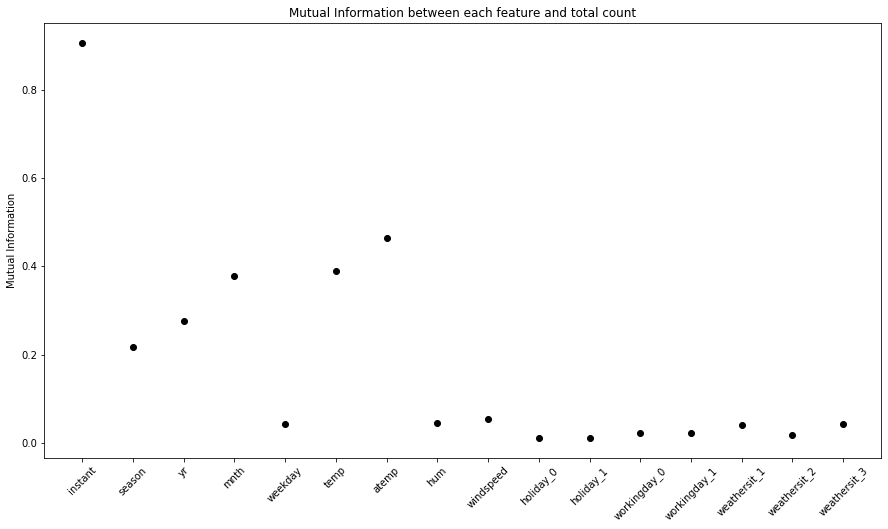

In [21]:
X_rides = ridesStandard.drop(columns=['casual','registered','cnt'])
Y_rides = ridesStandard['cnt']

mi_rides = mutual_info_regression(X=X_rides,y=Y_rides)

plt.figure(figsize = (15,8))
plt.plot(X_rides.columns,mi_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.title('Mutual Information between each feature and total count')

Text(0.5, 1.0, 'F scores between each feature and total count')

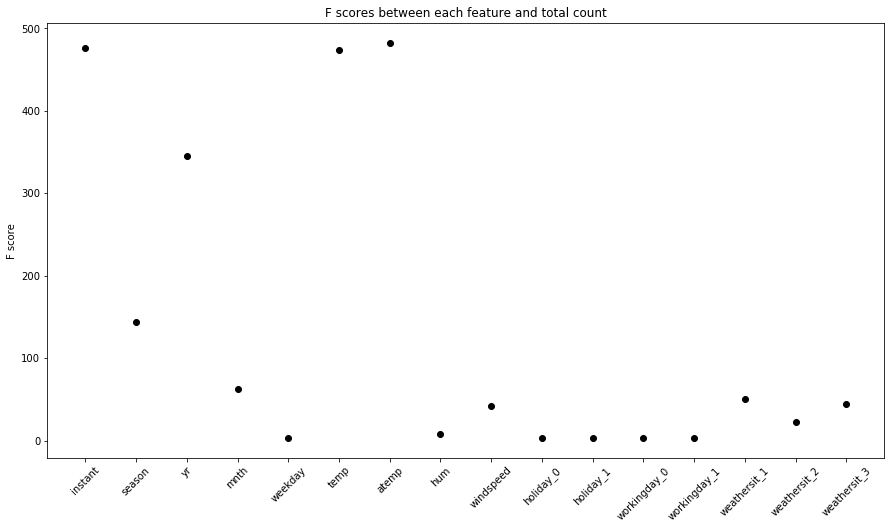

In [22]:
fval_rides, _ = f_regression(X=X_rides,y=Y_rides)

plt.figure(figsize = (15,8))
plt.plot(X_rides.columns,fval_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('F score')
plt.title('F scores between each feature and total count')

In [23]:
categorical_videos = ['codec','o_codec']
videos_encode = pd.get_dummies(data = videos, prefix = None, prefix_sep='_',columns = categorical_videos, drop_first=False)

In [24]:
videos_encode.head()

,id,duration,width,height,bitrate,framerate,i,p,b,frames,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,22508,0.612,0,0,1,0,0,0,1,0
1,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,25164,0.980,0,0,1,0,0,0,1,0
2,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,29228,1.216,0,0,1,0,0,0,1,0
3,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,34316,1.692,0,0,1,0,0,0,1,0
4,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,58528,3.456,0,0,1,0,0,0,1,0


In [25]:
videosStandard = videos_encode.drop(columns='id', inplace=False)

standard_columns_videos = videosStandard.columns.drop(['codec_flv','codec_h264','codec_mpeg4','codec_vp8','o_codec_flv','o_codec_h264','o_codec_mpeg4','o_codec_vp8','utime','umem'])
standard_scaler = preprocessing.StandardScaler()
videosStandard[standard_columns_videos] = standard_scaler.fit_transform(videosStandard[standard_columns_videos])

In [26]:
videosStandard.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,22508,0.612,0,0,1,0,0,0,1,0
1,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,25164,0.980,0,0,1,0,0,0,1,0
2,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,29228,1.216,0,0,1,0,0,0,1,0
3,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,34316,1.692,0,0,1,0,0,0,1,0
4,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.098879,-0.825201,-0.641488,...,58528,3.456,0,0,1,0,0,0,1,0


Text(0.5, 1.0, 'Mutual Information between each feature and transcoding time')

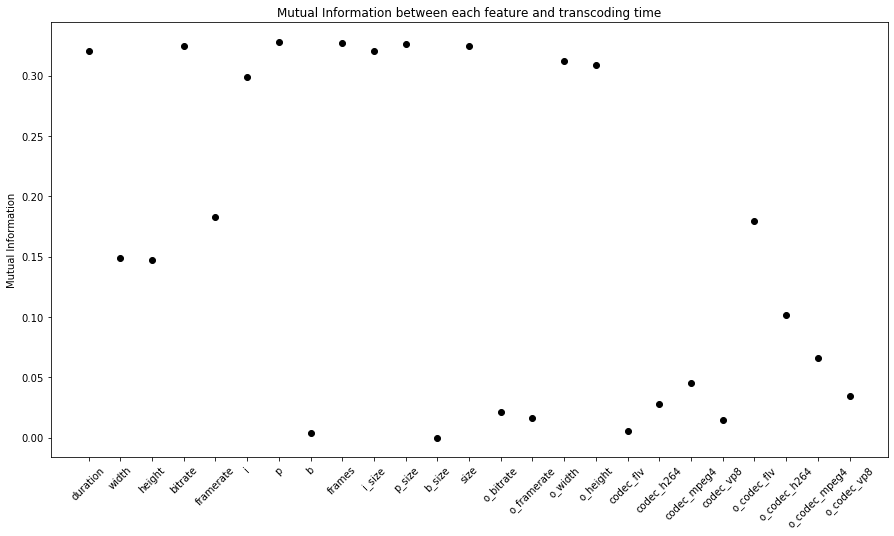

In [27]:
X_videos = videosStandard.drop(columns=['utime','umem'])
Y_videos = videosStandard['utime']

X_videos_columns = X_videos.columns

mi_videos = []

for col in X_videos_columns:
    xv = np.array(X_videos[col])
    xv_reshape = xv.reshape(-1,1)
    miv = mutual_info_regression(X=xv_reshape,y=Y_videos)
    mi_videos.append(miv)

plt.figure(figsize = (15,8))
plt.plot(X_videos.columns,mi_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.title('Mutual Information between each feature and transcoding time')

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'F scores between each feature and transcoding time')

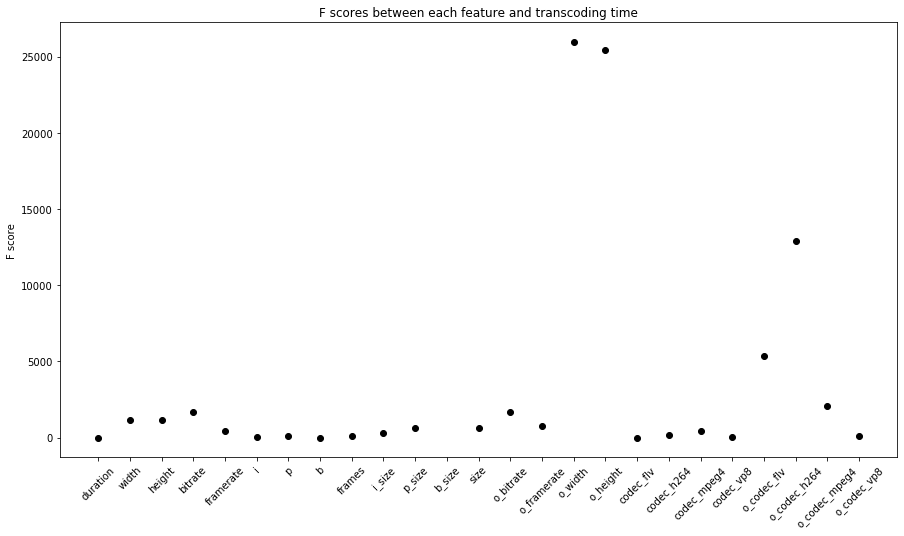

In [28]:
fval_videos, _ = f_regression(X=X_videos,y=Y_videos)

plt.figure(figsize = (15,8))
plt.plot(X_videos.columns,fval_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('F score')
plt.title('F scores between each feature and transcoding time')

In [29]:
#Feature Selection

rides_features_drop = ['weekday','hum','windspeed','holiday_0','holiday_1','workingday_0','workingday_1','weathersit_1','weathersit_2','weathersit_3','casual','registered','cnt']
X_ridesFinal = ridesStandard.drop(columns=rides_features_drop)
y_ridesFinal = ridesStandard['cnt']

In [30]:
X_ridesFinal.head()

,instant,season,yr,mnth,temp,atemp
0,-1.729683,-1.348213,-1.001369,-1.600161,-0.826662,-0.679946
1,-1.724944,-1.348213,-1.001369,-1.600161,-0.721095,-0.740652
2,-1.720205,-1.348213,-1.001369,-1.600161,-1.634657,-1.749767
3,-1.715466,-1.348213,-1.001369,-1.600161,-1.614780,-1.610270
4,-1.710728,-1.348213,-1.001369,-1.600161,-1.467414,-1.504971


In [31]:
videos_features_drop = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime','umem']
X_videosFinal = videosStandard.drop(columns=videos_features_drop)
y_videosFinal = videosStandard['utime']

In [32]:
X_videosFinal.head()

,duration,width,height,bitrate,framerate,i,p,frames,i_size,p_size,size,o_width,o_height,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,-1.026856,-1.138803,0,0,1,0
1,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,-0.790773,-0.834975,0,0,1,0
2,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,-0.528459,-0.455190,0,0,1,0
3,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,-0.266145,-0.075405,0,0,1,0
4,-0.54327,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.82206,-0.825201,-0.641488,-0.41896,-0.445729,0.783112,0.684165,0,0,1,0


Training Test Dataset split

In [33]:
x_train_rides, x_test_rides, y_train_rides, y_test_rides = train_test_split(X_ridesFinal, y_ridesFinal, test_size = 0.33, random_state = 42)

In [34]:
x_train_videos, x_test_videos, y_train_videos, y_test_videos = train_test_split(X_videosFinal, y_videosFinal, test_size = 0.33, random_state = 42)

In [35]:
# For bike sharing data

from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train_rides, y_train_rides)
y_predict_rides = lr.predict(x_test_rides)
rmse_lr = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)
print('No normalization RMSE: ', rmse_lr)
    
goodAlpharr = 0
goodrmserr = 0
goodAlphall = 0
goodrmsell = 0

iter_num = 100
for (it,alpha) in zip(np.arange(iter_num),np.logspace(-2,2,num = iter_num)):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_rides, y_train_rides)
    y_predict_rides = rr.predict(x_test_rides)
    rmse_rr = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)
    
    if it==0:
        goodAlpharr = alpha
        goodrmserr = rmse_rr
    elif rmse_rr < goodrmserr:
        goodAlpharr = alpha
        goodrmserr = rmse_rr

    ll = Lasso(alpha = alpha, max_iter=10e5)
    ll.fit(x_train_rides, y_train_rides)
    y_predict_rides = ll.predict(x_test_rides)
    rmse_ll = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)
    
    if it==0:
        goodAlphall = alpha
        goodrmsell = rmse_ll
    elif rmse_ll < goodrmsell:
        goodAlphall = alpha
        goodrmsell = rmse_ll
print('Ridge regression RMSE: ', goodrmserr, ' alpha: ', goodAlpharr)
print('Lasso regression RMSE: ', goodrmsell, ' alpha: ', goodAlphall)

No normalization RMSE:  1044.2321347295203
Ridge regression RMSE:  996.0626601491768  alpha:  17.07352647470692
Lasso regression RMSE:  1001.2538125756179  alpha:  14.174741629268063


In [36]:
# Video dataset

lr = LinearRegression()
lr.fit(x_train_videos, y_train_videos)
y_predict_videos = lr.predict(x_test_videos)
rmse_lr = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)
print('No normalization RMSE: ', rmse_lr)
    
goodAlpharr = 0
goodrmserr = 0
goodAlphall = 0
goodrmsell = 0

iter_num = 100
for (it,alpha) in zip(np.arange(iter_num),np.logspace(-2,2,num = iter_num)):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_videos, y_train_videos)
    y_predict_videos = rr.predict(x_test_videos)
    rmse_rr = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)
    
    if it==0:
        goodAlpharr = alpha
        goodrmserr = rmse_rr
    elif rmse_rr < goodrmserr:
        goodAlpharr = alpha
        goodrmserr = rmse_rr

    ll = Lasso(alpha = alpha, max_iter=1e5)
    ll.fit(x_train_videos, y_train_videos)
    y_predict_videos = ll.predict(x_test_videos)
    rmse_ll = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)
    
    if it==0:
        goodAlphall = alpha
        goodrmsell = rmse_ll
    elif rmse_ll < goodrmsell:
        goodAlphall = alpha
        goodrmsell = rmse_ll
print('Ridge regression RMSE: ', goodrmserr, ' alpha: ', goodAlpharr)
print('Lasso regression RMSE: ', goodrmsell, ' alpha: ', goodAlphall)

No normalization RMSE:  11.462578625813558
Ridge regression RMSE:  11.461171255554968  alpha:  9.770099572992256
Lasso regression RMSE:  11.46322937586839  alpha:  0.015922827933410922


In [37]:
# Without Feature Scaling Bike Sharing Dataset

rides_features_drop_wfs = ['weekday','hum','windspeed','holiday_0','holiday_1','workingday_0','workingday_1','weathersit_1','weathersit_2','weathersit_3','casual','registered','cnt','dteday']
X_ridesFinal_wfs = rides_encode.drop(columns=rides_features_drop_wfs)
y_ridesFinal_wfs = rides_encode['cnt']

x_train_rides_wfs, x_test_rides_wfs, y_train_rides_wfs, y_test_rides_wfs = train_test_split(X_ridesFinal_wfs, y_ridesFinal_wfs, test_size = 0.33, random_state = 42)

In [38]:
lr = LinearRegression()
lr.fit(x_train_rides_wfs, y_train_rides_wfs)
y_predict_rides_wfs = lr.predict(x_test_rides_wfs)
rmse_lr = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)
print('No normalization RMSE: ', rmse_lr)
    
goodAlpharr = 0
goodrmserr = 0
goodAlphall = 0
goodrmsell = 0

iter_num = 100
for (it,alpha) in zip(np.arange(iter_num),np.logspace(-2,2,num = iter_num)):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_rides_wfs, y_train_rides_wfs)
    y_predict_rides_wfs = rr.predict(x_test_rides_wfs)
    rmse_rr = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)
    
    if it==0:
        goodAlpharr = alpha
        goodrmserr = rmse_rr
    elif rmse_rr < goodrmserr:
        goodAlpharr = alpha
        goodrmserr = rmse_rr

    ll = Lasso(alpha = alpha, max_iter=10e5)
    ll.fit(x_train_rides_wfs, y_train_rides_wfs)
    y_predict_rides_wfs = ll.predict(x_test_rides_wfs)
    rmse_ll = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)
    
    if it==0:
        goodAlphall = alpha
        goodrmsell = rmse_ll
    elif rmse_ll < goodrmsell:
        goodAlphall = alpha
        goodrmsell = rmse_ll
print('Ridge regression RMSE: ', goodrmserr, ' alpha: ', goodAlpharr)
print('Lasso regression RMSE: ', goodrmsell, ' alpha: ', goodAlphall)

No normalization RMSE:  1044.2321347295208
Ridge regression RMSE:  992.8016033740976  alpha:  2.9150530628251787
Lasso regression RMSE:  991.9058708440994  alpha:  18.73817422860385


In [39]:
# Without Feature Scaling Video Dataset
videos_features_drop_wfs = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime','id','umem']
X_videosFinal_wfs = videos_encode.drop(columns=videos_features_drop_wfs)
y_videosFinal_wfs = videos_encode['utime']

x_train_videos_wfs, x_test_videos_wfs, y_train_videos_wfs, y_test_videos_wfs = train_test_split(X_videosFinal_wfs, y_videosFinal_wfs, test_size = 0.33, random_state = 42)

In [44]:
lr = LinearRegression()
lr.fit(x_train_videos_wfs, y_train_videos_wfs)
y_predict_videos_wfs = lr.predict(x_test_videos_wfs)
rmse_lr = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)
print('No normalization RMSE: ', rmse_lr)
    
goodAlpharr = 0
goodrmserr = 0
goodAlphall = 0
goodrmsell = 0

iter_num = 20
for (it,alpha) in zip(np.arange(iter_num),np.logspace(0,2,num = iter_num)):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_videos_wfs, y_train_videos_wfs)
    y_predict_videos_wfs = rr.predict(x_test_videos_wfs)
    rmse_rr = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)
    
    if it==0:
        goodAlpharr = alpha
        goodrmserr = rmse_rr
    elif rmse_rr < goodrmserr:
        goodAlpharr = alpha
        goodrmserr = rmse_rr

    ll = Lasso(alpha = alpha, max_iter=1e5)
    ll.fit(x_train_videos_wfs, y_train_videos_wfs)
    y_predict_videos_wfs = ll.predict(x_test_videos_wfs)
    rmse_ll = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)
    
    if it==0:
        goodAlphall = alpha
        goodrmsell = rmse_ll
    elif rmse_ll < goodrmsell:
        goodAlphall = alpha
        goodrmsell = rmse_ll
print('Ridge regression RMSE: ', goodrmserr, ' alpha: ', goodAlpharr)
print('Lasso regression RMSE: ', goodrmsell, ' alpha: ', goodAlphall)

No normalization RMSE:  11.462578625814086


C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.70975e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3712920.796004761, tolerance: 1192.926252316096
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.72724e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3752551.041039459, tolerance: 1192.926252316096
  model = cd_fast.enet_

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4103427.7838178305, tolerance: 1192.926252316096
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28464e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4084236.8099218737, tolerance: 1192.926252316096
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91125e-19): result may not be accurate.
  return linalg.solve

Ridge regression RMSE:  11.462581986144937  alpha:  1.0
Lasso regression RMSE:  12.008760324100606  alpha:  1.0


C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4026050.572735357, tolerance: 1192.926252316096
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'p-value of each feature for Bike Sharing Dataset')

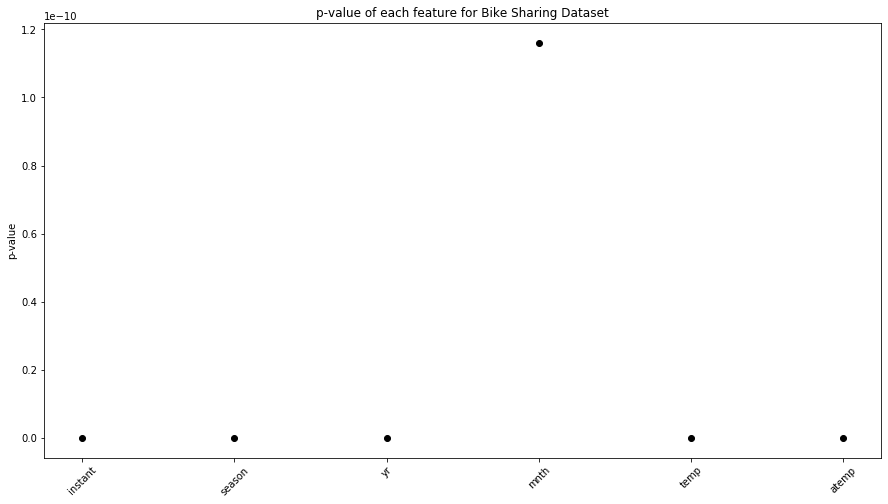

In [48]:
#p-values bike sharing dataset
from scipy import stats

features_rides = x_train_rides.columns
p_values_rides = []

for col in features_rides:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_train_rides[col], y_train_rides)
    p_values_rides.append(p_value)
    
plt.figure(figsize = (15,8))
plt.plot(x_train_rides.columns,p_values_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('p-value')
plt.title('p-value of each feature for Bike Sharing Dataset')

Text(0.5, 1.0, 'p-value of each feature for Bike Sharing Dataset')

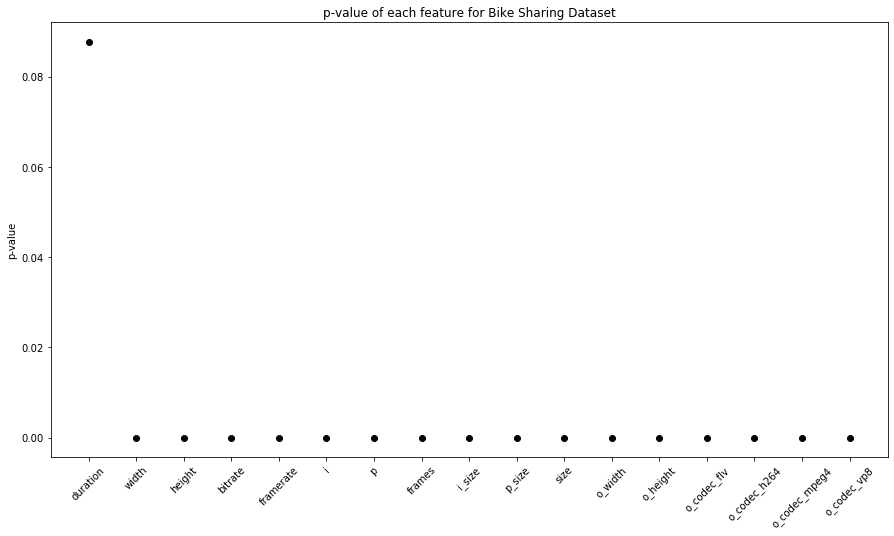

In [49]:
#p-values videos dataset

features_videos = x_train_videos.columns
p_values_videos = []

for col in features_videos:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_train_videos[col], y_train_videos)
    p_values_videos.append(p_value)
    
plt.figure(figsize = (15,8))
plt.plot(x_train_videos.columns,p_values_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('p-value')
plt.title('p-value of each feature for Bike Sharing Dataset')

## Q13-14
Polynomial Regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures

degrees_rides = np.arange(2,7)
alphabestrr_rides = 17.07352647470692
rmserrbest_rides_poly = 0
degreerrbest_rides = 0

for it,degree in zip(np.arange(len(degrees_rides)),degrees_rides):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_rides_poly = polynomial_features.fit_transform(x_train_rides)
    x_test_rides_poly = polynomial_features.transform(x_test_rides)
    rr = Ridge(alpha=alphabestrr_rides) #  comparison with alpha value
    rr.fit(x_train_rides_poly, y_train_rides)
    y_predict_rides_poly = rr.predict(x_test_rides_poly)
    rmse_rr = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides_poly, squared = False)
    
    if it==0:
        rmserrbest_rides_poly = rmse_rr
        degreerrbest_rides = degree
    elif rmse_rr < rmserrbest_rides_poly:
        rmserrbest_rides_poly = rmse_rr
        degreerrbest_rides = degree
        
print('Polynomial Regression RMSE: ', rmserrbest_rides_poly, ' degree: ', degreerrbest_rides)


Polynomial Regression RMSE:  879.0092493765568  degree:  3


In [56]:
# Without Regularization bike sharing dataset

degrees_rides = np.arange(2,7)
rmselrbest_rides_poly = 0
degreelrbest_rides = 0

for it,degree in zip(np.arange(len(degrees_rides)),degrees_rides):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_rides_poly = polynomial_features.fit_transform(x_train_rides)
    x_test_rides_poly = polynomial_features.transform(x_test_rides)
    lr = LinearRegression()
    lr.fit(x_train_rides_poly, y_train_rides)
    y_predict_rides_poly = lr.predict(x_test_rides_poly)
    rmse_lr = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides_poly, squared = False)
    
    if it==0:
        rmselrbest_rides_poly = rmse_lr
        degreelrbest_rides = degree
    elif rmse_lr < rmselrbest_rides_poly:
        rmselrbest_rides_poly = rmse_lr
        degreelrbest_rides = degree
        
print('Polynomial Regression with no regularization RMSE: ', rmselrbest_rides_poly, ' degree: ', degreelrbest_rides)


Polynomial Regression with no regularization RMSE:  1483.749687906837  degree:  2


No regularization causing an increase in the RMSE due to overfitting

In [59]:
# Video Dataset Polynomial Regression with Ridge
degrees_videos = np.arange(2,6)
alphabestrr_videos = 9.770099572992256
rmserrbest_videos_poly = 0
degreerrbest_videos = 0

for it,degree in zip(np.arange(len(degrees_videos)),degrees_videos):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_videos_poly = polynomial_features.fit_transform(x_train_videos)
    x_test_videos_poly = polynomial_features.transform(x_test_videos)
    rr = Ridge(alpha=alphabestrr_videos) #  comparison with alpha value
    rr.fit(x_train_videos_poly, y_train_videos)
    y_predict_videos_poly = rr.predict(x_test_videos_poly)
    rmse_rr = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos_poly, squared = False)
    
    if it==0:
        rmserrbest_videos_poly = rmse_rr
        degreerrbest_videos = degree
    elif rmse_rr < rmserrbest_videos_poly:
        rmserrbest_videos_poly = rmse_rr
        degreerrbest_videos = degree
        
print('Polynomial Regression RMSE: ', rmserrbest_videos_poly, ' degree: ', degreerrbest_videos)

Polynomial Regression RMSE:  9.116338152640678  degree:  2


## Q15
invf1 = (height * width)/bitrate
<br>
invf2 = (o_height * o_width)/o_bitrate

In [64]:
videos_encode_new = videos_encode
videos_encode_new['invf1'] = (videos_encode['height']*videos_encode['width'])/videos_encode['bitrate']
videos_encode_new['invf2'] = (videos_encode['o_height']*videos_encode['o_width'])/videos_encode['o_bitrate']

videosStandard_new = videos_encode_new.drop(columns='id', inplace=False)

standard_columns_videos_new = videosStandard_new.columns.drop(['codec_flv','codec_h264','codec_mpeg4','codec_vp8','o_codec_flv','o_codec_h264','o_codec_mpeg4','o_codec_vp8','utime','umem'])
standard_scaler = preprocessing.StandardScaler()
videosStandard_new[standard_columns_videos_new] = standard_scaler.fit_transform(videosStandard_new[standard_columns_videos_new])

videos_features_drop_new = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime','umem']
X_videosFinal_new = videosStandard_new.drop(columns=videos_features_drop_new)
y_videosFinal_new = videosStandard_new['utime']

x_train_videos_new, x_test_videos_new, y_train_videos_new, y_test_videos_new = train_test_split(X_videosFinal_new, y_videosFinal_new, test_size = 0.33, random_state = 42)

polynomial_features = PolynomialFeatures(degree=degreerrbest_videos)
x_train_videos_poly_new = polynomial_features.fit_transform(x_train_videos_new)
x_test_videos_poly_new = polynomial_features.transform(x_test_videos_new)
rr = Ridge(alpha=alphabestrr_videos) #  comparison with alpha value
rr.fit(x_train_videos_poly_new, y_train_videos_new)
y_predict_videos_poly_new = rr.predict(x_test_videos_poly_new)
rmserr_videos_poly_new = mean_squared_error(y_true= y_test_videos_new,y_pred= y_predict_videos_poly_new, squared = False)
        
print('Polynomial Regression RMSE: ', rmserr_videos_poly_new, ' degree: ', degreerrbest_videos)

Polynomial Regression RMSE:  7.5418653267979465  degree:  2
